Brian Rikshpun 316132927


### Import packages

`conda install -c conda-forge statsmodels`  
or  
`pip install statsmodels`

In [2]:
import statsmodels as smf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


Q1) a)  
Use `pandas.read_csv` to load the file ‘2020 World Happiness Report.csv’ into DataFrame object named **df**. (See https://www.kaggle.com/unsdsn/world-happiness or http://worldhappiness.report/ for more information about this report).  

DataFrame Cleaning:
- Use `pandas.DataFrame.shape` to determine:
    - How many observations are in the data? 
    - How many variables? 
- Remove columns **'Standard error of ladder score', 'upperwhisker', 'lowerwhisker', 'Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices','Generosity', 'Perceptions of corruption', 'Ladder score in Dystopia', 'Dystopia + residual'** from the data frame using `pandas.DataFrame.drop()`. 
- Rename the variables **"Country name", "Regional indicator", "Ladder score", "Explained by: Log GDP per capita", "Explained by: Social support", "Explained by: Healthy life expectancy", "Explained by: Freedom to make life choices", "Explained by: Generosity", "Explained by: Perceptions of corruption"** to **“Country”, "Region", “Happiness”, “Economy”, “Family”, “Health”, “Freedom”, “Trust”** respectively using `pandas.DataFrame.rename()`. 
- In the modified data frame use `pandas.DataFrame.info()` to determine what are the variable names and types? 
- How many different Regions are in the data? (You can use `pandas.Series.astype('category')` to convert Region to categorical and `pandas.Series.cat.categories` to get the categories names). 
- Print the min/max/mean Happiness score?

In [4]:
# read csv
data = pd.read_csv("2020 World Happiness Report.csv")

# display DataFrame
display(data)

# Print DataFrame shape
print(data.shape)

                 Country name  ... Dystopia + residual
0                     Finland  ...            2.762835
1                     Denmark  ...            2.432741
2                 Switzerland  ...            2.350267
3                     Iceland  ...            2.460688
4                      Norway  ...            2.168266
..                        ...  ...                 ...
148  Central African Republic  ...            2.860198
149                    Rwanda  ...            0.548445
150                  Zimbabwe  ...            0.841031
151               South Sudan  ...            1.378751
152               Afghanistan  ...            1.507236

[153 rows x 20 columns]
(153, 20)


In [5]:
# drop columns
data = data.drop(columns = ['Standard error of ladder score', 'upperwhisker', 'lowerwhisker', 'Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices','Generosity', 'Perceptions of corruption', 'Ladder score in Dystopia', 'Dystopia + residual'])

# rename columns
data = data.rename(columns = {"Country name":"Country", "Regional indicator":"Region", "Ladder score":"Happiness", "Explained by: Log GDP per capita" : "Economy", "Explained by: Social support" : "Family", "Explained by: Healthy life expectancy":"Health", "Explained by: Freedom to make life choices": "Freedom", "Explained by: Generosity": "Generosity", "Explained by: Perceptions of corruption": "Trust"} )

# display DataFrame
display(data)


,Country,Region,Happiness,Economy,Family,Health,Freedom,Generosity,Trust
0,Finland,Western Europe,7.8087,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857
1,Denmark,Western Europe,7.6456,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260
2,Switzerland,Western Europe,7.5599,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946
3,Iceland,Western Europe,7.5045,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541
4,Norway,Western Europe,7.4880,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101
...,...,...,...,...,...,...,...,...,...
148,Central African Republic,Sub-Saharan Africa,3.4759,0.041072,0.000000,0.000000,0.292814,0.253513,0.028265
149,Rwanda,Sub-Saharan Africa,3.3123,0.343243,0.522876,0.572383,0.604088,0.235705,0.485542
150,Zimbabwe,Sub-Saharan Africa,3.2992,0.425564,1.047835,0.375038,0.377405,0.151349,0.080929
151,South Sudan,Sub-Saharan Africa,2.8166,0.289083,0.553279,0.208809,0.065609,0.209935,0.111157


In [6]:
# print DataFrame info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     153 non-null    object 
 1   Region      153 non-null    object 
 2   Happiness   153 non-null    float64
 3   Economy     153 non-null    float64
 4   Family      153 non-null    float64
 5   Health      153 non-null    float64
 6   Freedom     153 non-null    float64
 7   Generosity  153 non-null    float64
 8   Trust       153 non-null    float64
dtypes: float64(7), object(2)
memory usage: 10.9+ KB


In [7]:
# convert Region to categorical
data['Region'] = data['Region'].astype('category')


# print Region Categories
print(data['Region'].cat.categories)

Index(['Central and Eastern Europe', 'Commonwealth of Independent States',
       'East Asia', 'Latin America and Caribbean',
       'Middle East and North Africa', 'North America and ANZ', 'South Asia',
       'Southeast Asia', 'Sub-Saharan Africa', 'Western Europe'],
      dtype='object')


In [8]:
import numpy as np

# print min, max, mean Happiness
print (min(data['Happiness']),max(data['Happiness']) , np.mean(data['Happiness']) )

2.566900015 7.808700085 5.47323986284967


b) Loop over the last 6 variables in the data frame (**Economy**, **Family**, **Health**, **Freedom**, **Generosity**, **Trust**), and for each variable call `seaborn.scatterplot` to create a scatter plot of each of the variables against the Happiness variable (6 scatter plots altogether arranged in a `plt.subplots` of 2 rows by 3 columns). Set the `hue` of the points according to their **Region**, set the `legend` to **False**, and set the `ax` parmeter to the correct subplots axes. Add a regression line to each plot using `seaborn.regplot`. Set `truncate` parameter to **True**, and `scatter` to **False**.  
Which variables seem to have a linear relation with Happiness?

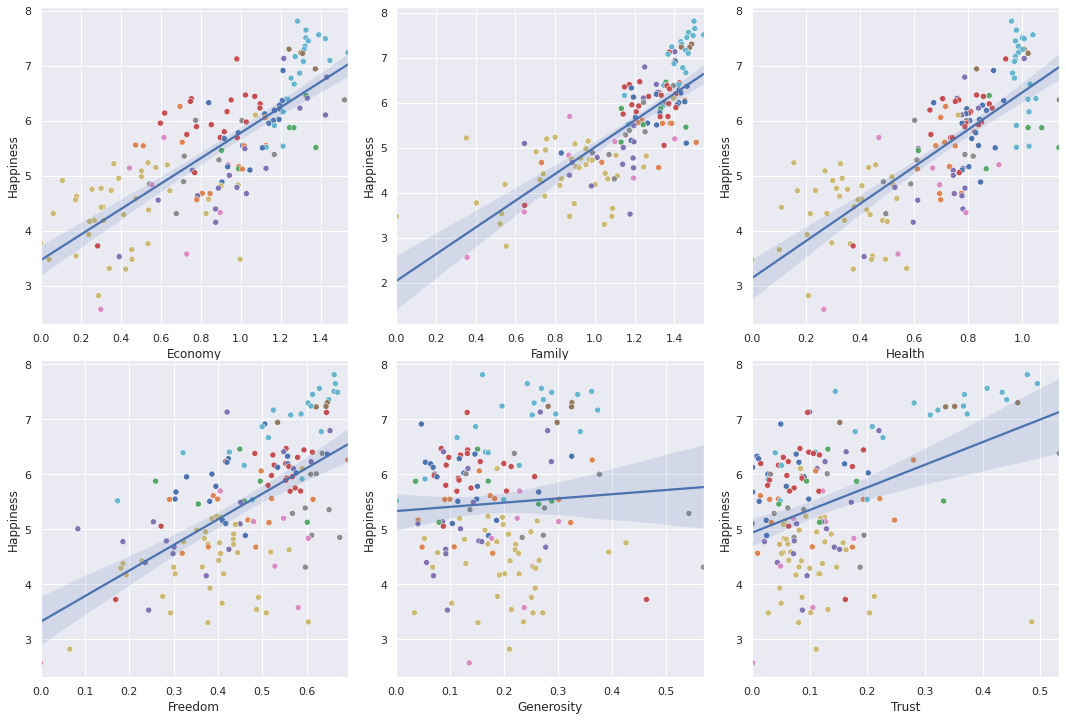

In [9]:
# b)
sns.set()

# define a function for plotting a single axis (predictor vs. Happiness)
def plot_pred_vs_happiness(df, pos, axes, pos3):
  axes = axes.flatten()
  sns.scatterplot(data = df, x = df[df.columns[pos]], y = 'Happiness', hue = 'Region', ax = axes[pos3], legend = False)
  sns.regplot(data = df, x = df[df.columns[pos]], y = 'Happiness', truncate = True, scatter = False, ax = axes[pos3])



# Define 2x3 subplots
f,axes = plt.subplots(2,3,figsize = (15,10))

# Adjust the padding between and around subplots.
plt.tight_layout()
f.tight_layout()

# loop over predictors / axes
for pos in range(3,9):
    plot_pred_vs_happiness(data, pos, axes, pos-3)

plt.show()    
    

Theres seems to be linear connection between Happiness and Economy, Freedom, Family and Health (each one separately). 

c)	Use a single call to `seaborn.lmplot` to create a scatter plot of Economy vs. Happiness with the colors of the points according to their Region (`hue`=**"Region"**). Make sure the confidence intervals for the regression lines are not shown (`ci`=**False**), and that the regression line is bounded by the data limits (`truncate`=**True**).  
Which region seems to have the steepest positive slope?

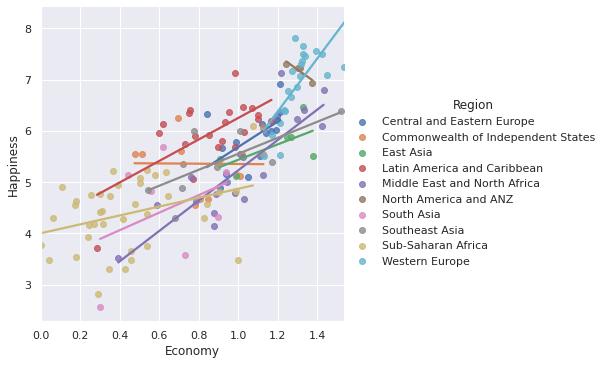

In [10]:
# c)
sns.lmplot(data = data, x = 'Economy', y = 'Happiness', hue = 'Region' ,truncate = True, ci = False  )


Western Europe

d) Use `seaborn.countplot` to create a bar plot showing the number of countries in each Region. Have the bars displayed horizontally instead of vertically sorted by their count (number of countries by region). Hint: use the `order` parameter with `value_counts().index`.  
Why does flipping the coordinates improve the plot in this case?

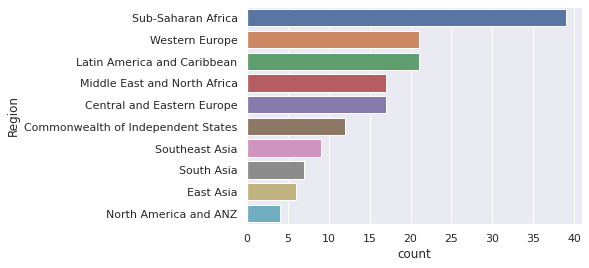

In [107]:
# d)
sns.countplot( data = data , y = 'Region' , order = data['Region'].value_counts().index)


You can see easly which present of the 100% - Sub Saharan Africa each region is


e) Use `seaborn.boxplot` to create a box plot showing the distribution of **Happiness** for each **Region**. Have the boxplot displayed horizontally and ordered according to the mean **Happiness** value for each **Region**.  
**Hint:** use the `order` parameter with a concatenation of the methods `groupby()` and `mean()`, and `sort_values().index`.  
Which Region has the most variability in Happiness?  
Which Region has the least variability?  

North America and ANZ


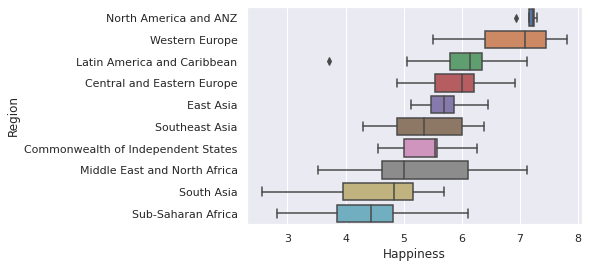

In [108]:
# e)
sns.boxplot(data = data , y = 'Region', x = 'Happiness', order = data.groupby(by = ['Region'])['Happiness'].mean().sort_values().index[::-1] )


f) Call `seaborn.pairplot` or `seaborn.PairGrid()` function with a subset of the DataFrame which includes the last 7 variables.  
What does this function plot?  
What does it show on the diagonal? Above the diagonal? Below the diagonal?  
What can you learn from this plot that you couldn’t tell from the plots you created in section (b)?

Correlations between the variables and the std err of each one

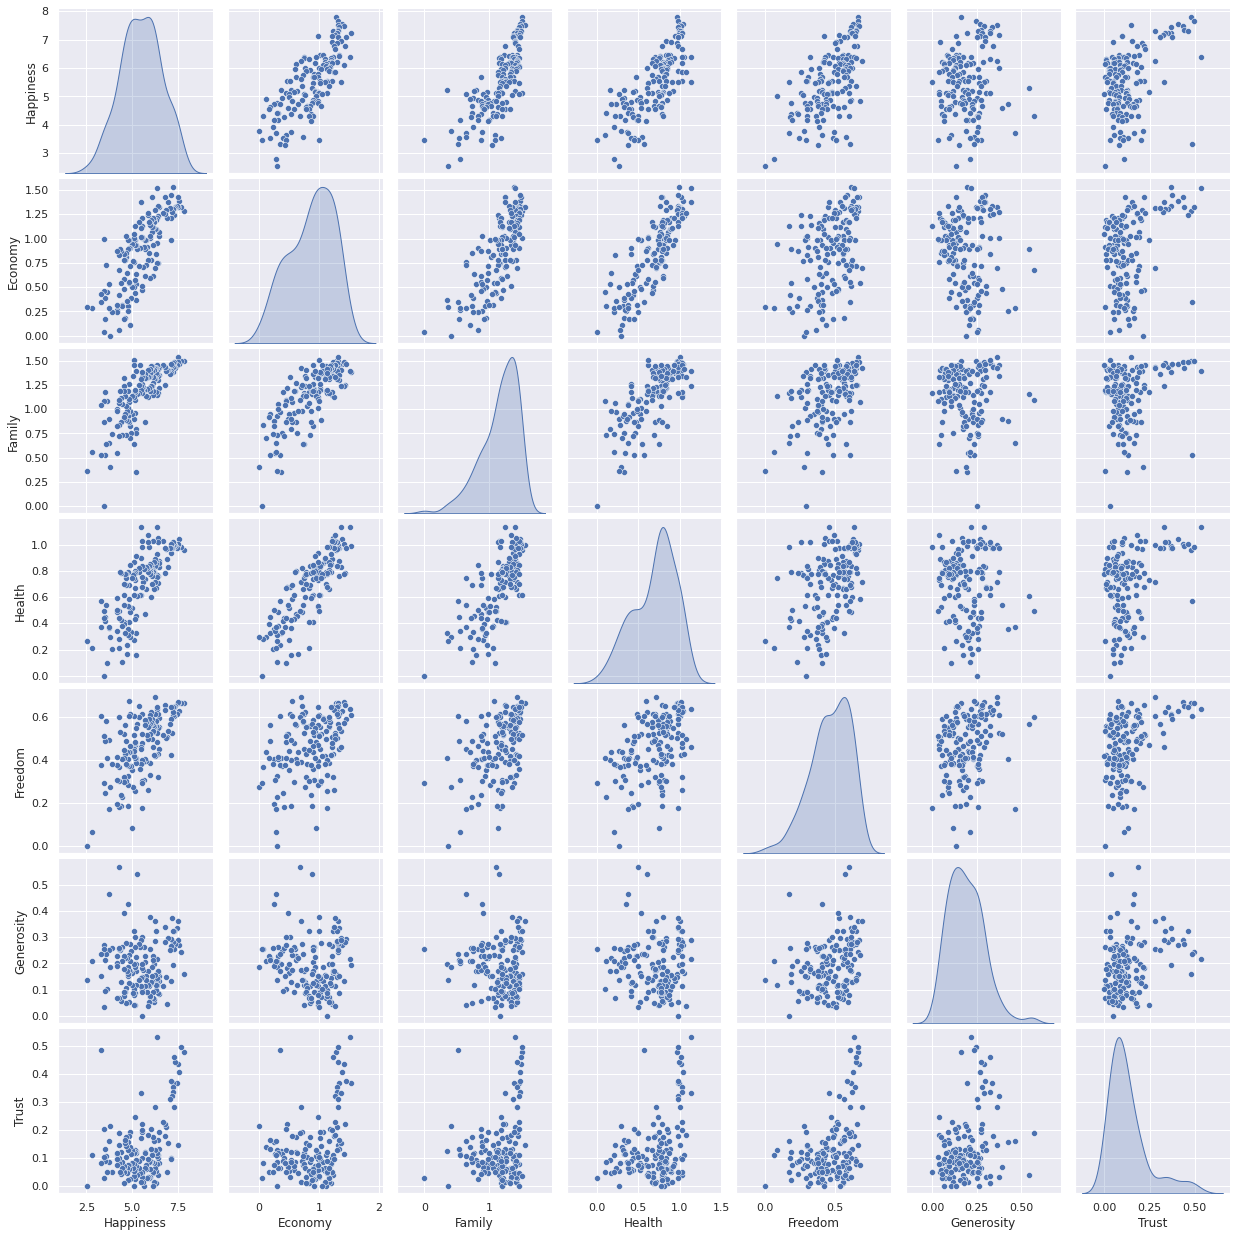

In [109]:
# f)
sns.pairplot(data, diag_kind='kde')




Q2) Using the 2020 World Happiness report:  
a) Create a data frame which includes the variables **Country**, **Economy_Rank** (which
contains a ranking of the Economies) and **Economy** (in this order), with only the top-5
ranked economies and the bottom-5 ranked economies, ordered from top to bottom.  
Note 1: Create **df2**, a copy of the cleaned up DataFrame **df** after all preprocessing steps of Q1)a).  
Note 2: For **Economy_Rank** multiply column **Economy** by -1, and then call DataFrame `rank()` using method 'min' to break ties.  

In [11]:
# Q2) a)
# create df2, a new copy of DataFrame
df2 = data.copy()
# add column 'Economy_Rank'
df2['Economy_Rank'] = df2['Economy'] * -1
df2['Economy_Rank'] = df2['Economy_Rank'].rank(method = 'min')
# leave only 'Country', 'Economy_Rank', 'Economy' columns

df2 = df2[['Country', 'Economy_Rank' , 'Economy' ]]

# sort DataFrame rows by 'Economy_Rank'

df2 = df2.sort_values(by = ['Economy_Rank'], ascending = True)

# diplay top-5 and bottom-5 economies

display(df2.head() , df2.tail())






,Country,Economy_Rank,Economy
9,Luxembourg,1.0,1.536676
30,Singapore,2.0,1.519580
15,Ireland,3.0,1.446887
20,United Arab Emirates,4.0,1.431086
47,Kuwait,5.0,1.424834


,Country,Economy_Rank,Economy
123,Liberia,149.0,0.174103
102,Niger,150.0,0.108330
130,Congo (Kinshasa),151.0,0.062487
148,Central African Republic,152.0,0.041072
139,Burundi,153.0,0.000000


b) Create a data frame which includes variables for the number of countries in each region
and the mean happiness for each region, ordered from the highest mean happiness to
the lowest mean happiness.  
Note 1: Create **df3**, a copy of the cleaned up DataFrame **df** after all preprocessing steps of Q1)a).  
Note 2: Use Dataframe `groupby` method to group by **Region**, and then concatenate a call to `agg` method to calculate `count` (number of countries in each group) and `mean` **Happiness**.  
Note 3: Call DataFrame `columns.droplevel()` method to remove **Happiness** column index level.  
Note 4: Finally sort DataFrame by mean **Happiness** in descending order.

In [12]:
# Q2) b)
# create df3, a new copy of DataFrame
df3 = data.copy()
# group by Region and call agg to calcultae count (number of countries per region) and mean Happiness
df3 = df3.groupby(by = ['Region'])['Happiness'].agg(['count', 'mean'])

# drop Happiness level 
#df3 = df3.droplevel('Region')

# sort DataFrame by mean Hppiness in descending order
df3 = df3.sort_values(by = 'mean', ascending = False)

display(df3)

,count,mean
Region,,
North America and ANZ,4,7.173525
Western Europe,21,6.899219
Latin America and Caribbean,21,5.981786
Central and Eastern Europe,17,5.883818
East Asia,6,5.714850
Southeast Asia,9,5.383367
Commonwealth of Independent States,12,5.358342
Middle East and North Africa,17,5.227159
South Asia,7,4.475443


Q3) Using the 2020 World Happiness report and `statsmodels` package:  
a) Fit a simple linear model to predict **Happiness** using each of the six numeric predictors.  
Report in a summary table (a DataFrame named `slm_sum_table`) the **estimate**, **95% CI** and **p-value** for the slope coefficient (not the intercept)
and the **R2** statistic for each fit.  
How are the results obtained by the fits reafirm what
you can see in the plots from Q1)b)?

Example fit a simple linear model to predict **Happiness** based on **Economy** predictor.

In [13]:
import statsmodels.api as sm


df4 = data.copy()


X = df4[['Economy', 'Family', 'Health', 'Freedom','Generosity', 'Trust']]
y = df4['Happiness']

mod = sm.OLS(y,X)
res = mod.fit()
print(res.summary())





/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                                 OLS Regression Results                                
Dep. Variable:              Happiness   R-squared (uncentered):                   0.985
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                              1653.
Date:                Sat, 14 Aug 2021   Prob (F-statistic):                   3.40e-132
Time:                        16:32:49   Log-Likelihood:                         -156.94
No. Observations:                 153   AIC:                                      325.9
Df Residuals:                     147   BIC:                                      344.1
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

You may want to define a function `slm_summary` which given the model fit result `res` and the predictor name `predName` returns a dictionary `d` with the keys "pred-name", "estimate", "LCI", "UCI", "p-values", "R-squared".

In [14]:


# define a function slm_summary which takes as input
# model fit result `res` and the predictor name `predName`

def slm_summary(res , predName):
  d = {"pred-name":"","estimate":"","LCI":"","UCI":"","p-value":"","R-squared":"" }
  d["pred-name"] = predName
  d["estimate"] = res.params[0]
  d["LCI"] = res.conf_int()[0][0]
  d["UCI"] = res.conf_int()[1][0]
  d["p-value"] = res.pvalues[0]
  d["R-squared"] =  res.rsquared
  return d



# copy dataframe
df4 = data.copy()
# instantiate ordinary least square (ols) model
X = df4['Economy']
y = df4['Happiness']
mod = sm.OLS(y,X)



# fit model - learn linear model parameters
res = mod.fit()


# get statistics summary as dictionary
predName = 'Economy'
d = slm_summary(res, predName)
d

{'LCI': 5.425461748845604,
 'R-squared': 0.9249739449483003,
 'UCI': 5.9443733034577795,
 'estimate': 5.6849175261516915,
 'p-value': 2.203592280555851e-87,
 'pred-name': 'Economy'}

In [15]:
import statsmodels.formula.api as smf

N = 6
# initialize DataFrame
slm_sum_table = pd.DataFrame(columns=["pred-name", "estimate", "LCI", "UCI", "p-value", "R-squared"])
# Loop over N variables
for i in range(N):
    # set predictor index (Skip 3 columns - Country, Region, Happiness)
    i = i + 3
    # set formula
    formula = 'Happiness ~ {}'.format(df4.columns[i])
    # Instantiate statsmodels ordinary least squares model with formula
    mod = smf.ols(formula = formula, data = df4)
    # Learn (call fit) the linear model parameters
    res = mod.fit()
    # Call slm_summary to extract the summary statistics dictionary
    d = slm_summary(res, df4.columns[i])
    #print(d)
    # add the statistics of current predictor to summary table
    slm_sum_table = slm_sum_table.append(d, ignore_index = True)
    # slm_sum_table

slm_sum_table

,pred-name,estimate,LCI,UCI,p-value,R-squared
0,Economy,3.461373,3.174871,3.747875,4.068958e-53,0.601205
1,Family,2.045532,1.567558,2.523507,2.198841e-14,0.585226
2,Health,3.136895,2.805806,3.467984,3.431185e-41,0.593387
3,Freedom,3.316097,2.820836,3.811359,5.103971e-27,0.348805
4,Generosity,5.328391,4.947775,5.709008,5.461794e-61,0.004767
5,Trust,4.935481,4.687560,5.183403,3.036314e-81,0.174979


How are the results obtained by the fits reafirm what you can see in the plots from Q1)b)?

b) Fit a simple linear model to predict Happiness using Region. How are the results of
the fit relate to the results from Q2b?

In [26]:
# fit linear model Happiness vs. Region
# instantiate statsmodels ordinary least squares model
df4 = data.copy()
mod = smf.ols(formula='Happiness ~ Region', data=df4)

# fit linear model
res = mod.fit()
# extract the 'Coef.', 'Std.Err.', and 'P>|t|' columns.

slm_sum_table2 = pd.DataFrame()
d2 = {}


for j in range(0,len(res.params)):
    d2["Coef"] = res.params[j]
    d2["Std Err"] = res.bse[j]
    d2["P>t"] = res.pvalues[j]
    slm_sum_table2 = slm_sum_table2.append(d2, ignore_index = True)
# print(res.params)
# print(res.bse[0])
# print(res.pvalues[0])

# display DataFrame
slm_sum_table2

,Coef,P>t,Std Err
0,5.883818,2.997646e-71,0.170403
1,-0.525476,4.920856e-02,0.264902
2,-0.168968,6.133195e-01,0.333630
3,0.097968,6.697377e-01,0.229224
4,-0.656659,7.235826e-03,0.240986
5,1.289707,1.207792e-03,0.390442
6,-1.408375,1.622304e-05,0.315525
7,-0.500451,8.616479e-02,0.289629
8,-1.500323,1.416379e-11,0.204192
9,1.015401,1.862932e-05,0.229224
